In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# read dataset
df_train = pd.read_csv("titanic_training.csv")
df_test = pd.read_csv("titanic_testing.csv")

In [4]:
def preprocess(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
    df['Name'] = df['Name'].str.len()
    return df

In [5]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [6]:
X = df_train.iloc[:, 0:7].values # attributes/inputs
y = df_train['Survived'].values # output / needs to be predict
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X.shape

(664, 7)

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

clf_Knn = KNeighborsClassifier(n_neighbors=1)
clf_Knn2 = KNeighborsClassifier(n_neighbors=3)
clf_Knn3 = KNeighborsClassifier(n_neighbors=5)
clf_Knn4 = KNeighborsClassifier(n_neighbors=10)
clf_Knn5 = KNeighborsClassifier(n_neighbors=15)
clf_Knn6 = KNeighborsClassifier(n_neighbors=20)


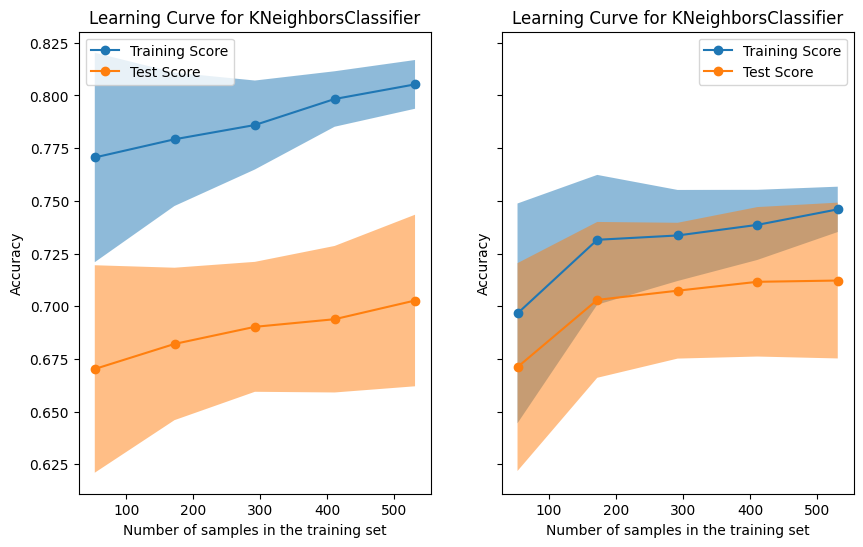

In [9]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf_Knn3, clf_Knn5]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [11]:
X_test = df_test.iloc[:, 0:7].values # attributes/inputs
y_test = df_test['Survived'].values # output / needs to be predict

In [12]:
def distance(pa, pb):
    return np.sum((pa - pb)**2)**0.5

In [13]:
def KNN(x, y, x_query, k=5):
    n = x.shape[0] # collect num of training data
    distances = []
    
    # for all training data points, we calculate their distance to testing point (x_query)
    # and we sort the distance asendingly, pick the top k nearest neighbors, then collect their label.
    for i in range(n):
        dis = distance(x_query, x[i]) # x_query is the testing point that needs to be predicted by the knn model
        distances.append((dis, y[i])) # [distance, label]

    # sort
    distances = sorted(distances)
    
    # take top 5
    distances = distances[:k]
    
    # convert to numpy to extract data
    distances = np.array(distances)
    #print(distances)
    
    labels = distances[:, 1]
    
    uniq_label, counts = np.unique(labels, return_counts=True)
    #print(uniq_label, counts)
    predict = uniq_label[counts.argmax()]
    
    return (predict)

In [14]:
X_test.shape[0]

223

In [11]:
# predict the second data point from testing sample, with k = 3
KNN(X, y, x_test[1], k = 21)

0.0

In [39]:
# predict all testing data points with k = 5 (default)  
predictions = []
for i in range(X_test.shape[0]):
    p = KNN(X, y, X_test[i], k=35)
    predictions.append(p)

In [40]:
print(predictions)

[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [41]:
# verify predictions with actual testing data points:
predictions = np.array(predictions)
#print(predictions)
success_rate = (y_test[:223] == predictions).sum()/len(predictions)
print(success_rate)

0.6816143497757847
